# Яременко Вікторія ФІТ 4-4. Лабораторна №5

In [1]:
!pip install pyspark==3.0.1 py4j==0.10.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 20.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612223 sha256=7a3dea686e2460006cd13b96db0bed00ff7fb96b120df57e838200f8b89791f8
  Stored in directory: /root/.cache/pip/wheels/19/b0/c8/6cb894117070e130fc44352c2a13f15b6c27e440d04a84fb48
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


1. Прочитайте CSV файл spark.read.csv()

2. Вивести схему даних за допомогою PrintSchema.

In [3]:
import pandas as pd
from pyspark.sql import SparkSession

# Ініціалізуємо SparkSession
spark = SparkSession.builder \
    .appName("Read CSV and Print Schema") \
    .getOrCreate()

# Читаємо CSV файл
df = spark.read.csv("/content/sample_data/bestsellers with categories (1).csv", header=True, inferSchema=True)

# Виводимо схему даних
df.printSchema()


root
 |-- Name: string (nullable = true)
 |-- Author: string (nullable = true)
 |-- User Rating: double (nullable = true)
 |-- Reviews: integer (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Genre: string (nullable = true)



3. Вивести назви стовпців і типи даних за допомогою dtypes

In [4]:
# Перетворюємо Spark DataFrame у Pandas DataFrame для використання методу dtypes
pandas_df = df.toPandas()

# Виводимо назви стовпців і типи даних
print(pandas_df.dtypes)

Name            object
Author          object
User Rating    float64
Reviews          int32
Price            int32
Year             int32
Genre           object
dtype: object


4. Виведіть перші п'ять рядків (використовується метод head)

In [5]:
# Виводимо перші п'ять рядків
df.show(5)

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
only showing top 5 rows



5. Вивести перший рядок за допомогою first()

In [6]:
# Виводимо перший рядок
first_row = df.first()
print(first_row)

Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350, Price=8, Year=2016, Genre='Non Fiction')


6. Зробіть опис датасету за допомогою describe()

In [7]:
# Отримуємо опис датасету
description = df.describe()

# Виводимо опис датасету
description.show()

+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|summary|                Name|          Author|        User Rating|           Reviews|             Price|              Year|      Genre|
+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|  count|                 550|             550|                550|               550|               550|               550|        550|
|   mean|                null|            null|  4.618363636363641|11953.281818181818|              13.1|            2014.0|       null|
| stddev|                null|            null|0.22698036502519656|11731.132017431892|10.842261978422364|3.1651563841692782|       null|
|    min|"The Plant Parado...|Abraham Verghese|                3.3|                37|                 0|              2009|    Fiction|
|    max|You Are a Badass:...|    Zhi Gan

7. Виведіть список стовпців за допомогою columns()

In [8]:
# Отримуємо список стовпців
columns_list = df.columns

# Виводимо список стовпців
print(columns_list)

['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']


8. Виведіть загальну кількість рядків даних за допомогою count()

In [9]:
# Отримуємо загальну кількість рядків
row_count = df.count()

# Виводимо загальну кількість рядків
print("Total number of rows:", row_count)

Total number of rows: 550


9. Перевірте, чи у всіх рядків вистачає даних. Якщо є пропуски, замінить їх на NaN, потім тип даних на числовий.

In [11]:
from pyspark.sql.functions import col

# Перевіряємо наявність пропусків у всіх рядках
for column in df.columns:
    count_nulls = df.where(col(column).isNull()).count()
    if count_nulls > 0:
        print(f"Кількість пропущених значень у стовпці '{column}': {count_nulls}")

# Замінюємо пропущені значення на NaN
df = df.na.fill('NaN')

# Конвертуємо всі стовпці в числовий тип даних
for column in df.columns:
    df = df.withColumn(column, col(column).cast('float'))

# Виводимо схему даних після заміни та конвертації
df.printSchema()

root
 |-- Name: float (nullable = true)
 |-- Author: float (nullable = true)
 |-- User Rating: float (nullable = true)
 |-- Reviews: float (nullable = true)
 |-- Price: float (nullable = true)
 |-- Year: float (nullable = true)
 |-- Genre: float (nullable = true)



10. Замініть комірки з пропущеними значенями на середні за стовпцем. І тип даних на float. Про скільки книг зберігає дані датасет?

In [44]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean

# Замінюємо пропущені значення на середні за стовпцем
for column in df.columns:
    mean_value = df.select(mean(column)).collect()[0][0]
    # Перевіряємо, чи mean_value є None, і якщо так, замінюємо його на 0
    mean_value = mean_value if mean_value is not None else 0
    df = df.na.fill(float(mean_value), [column])

# Конвертуємо всі стовпці в числовий тип даних (float)
for column in df.columns:
    df = df.withColumn(column, df[column].cast('float'))

# Отримуємо кількість рядків у датасеті
books_count = df.count()

# Виводимо кількість книг у датасеті
print("Кількість книг у датасеті:", books_count)

# Виводимо схему даних після заміни та конвертації
df.printSchema()

Кількість книг у датасеті: 550
root
 |-- name: float (nullable = true)
 |-- author: float (nullable = true)
 |-- user_rating: float (nullable = false)
 |-- reviews: float (nullable = true)
 |-- price: float (nullable = true)
 |-- year: float (nullable = true)
 |-- genre: float (nullable = true)



11. Змініть назви всіх колонок: назва з маленької букви, без пробілів через підкреслення.

In [21]:
# Змінюємо назви всіх колонок
for old_column in df.columns:
    new_column = old_column.lower().replace(' ', '_')
    df = df.withColumnRenamed(old_column, new_column)

# Виводимо схему даних після зміни назв колонок
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- author: string (nullable = true)
 |-- user_rating: double (nullable = true)
 |-- reviews: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- genre: string (nullable = true)



12. df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [22]:
# Встановлюємо нові назви стовпців
new_columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df = df.toDF(*new_columns)

# Виводимо схему даних після зміни назв колонок
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- author: string (nullable = true)
 |-- user_rating: double (nullable = true)
 |-- reviews: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- genre: string (nullable = true)



13. Знайдіть автора з найвищим рейтингом.

In [24]:
from pyspark.sql.functions import desc

# Знайти автора з найвищим рейтингом
author_with_highest_rating = df.orderBy(desc("user_rating")).select("author").first()[0]

# Виводимо результат
print("Автор з найвищим рейтингом:", author_with_highest_rating)

Автор з найвищим рейтингом: Bill Martin Jr.


14. Знайдіть автора з найнижчим рейтингом.

In [26]:
from pyspark.sql.functions import asc

# Знайти автора з найнижчим рейтингом
author_with_lowest_rating = df.orderBy(asc("user_rating")).select("author").first()[0]

# Виводимо результат
print("Автор з найнижчим рейтингом:", author_with_lowest_rating)

Автор з найнижчим рейтингом: J.K. Rowling


15. Знайдіть автора, що має найбільшу кількіть рецензій.

In [27]:
# Знайдемо автора з найбільшою кількістю рецензій
author_with_most_reviews = df.orderBy(desc("reviews")).select("author").first()[0]

# Виведемо результат
print("Автор з найбільшою кількістю рецензій:", author_with_most_reviews)

Автор з найбільшою кількістю рецензій: Delia Owens


16. Побудуйте гістограму рейтингу 10 найкращих книг (відібрати книги з найбільшим рейтингом).

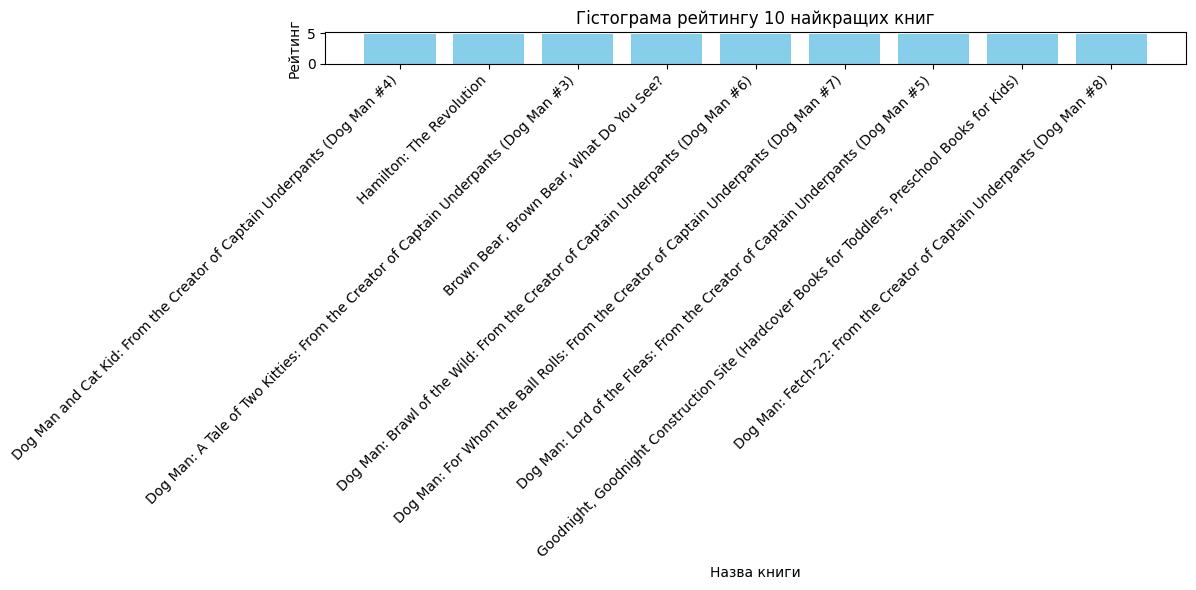

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Відібираємо 10 книг з найвищим рейтингом
top_10_books = df.orderBy(desc("user_rating")).limit(10)

# Перетворюємо DataFrame на Pandas DataFrame
top_10_books_df = top_10_books.toPandas()

# Побудова гістограми з назвами книг
plt.figure(figsize=(12, 6))
plt.bar(top_10_books_df['name'], top_10_books_df['user_rating'], color='skyblue')
plt.xlabel('Назва книги')
plt.ylabel('Рейтинг')
plt.title('Гістограма рейтингу 10 найкращих книг')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

17. Побудуйте матрицю кореляції для стовпчиків 'user_rating', 'reviews', 'price'.

In [35]:
# Обираємо необхідні стовпці та конвертуємо DataFrame у Pandas DataFrame
selected_columns = ['user_rating', 'reviews', 'price']
selected_df = df.select(selected_columns).toPandas()

# Побудова матриці кореляції
correlation_matrix = selected_df.corr()

# Виведення матриці кореляції
print("Матриця кореляції:")
print(correlation_matrix)

Матриця кореляції:
             user_rating   reviews     price
user_rating     1.000000 -0.001729 -0.133086
reviews        -0.001729  1.000000 -0.109182
price          -0.133086 -0.109182  1.000000
